In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# data = pd.read_csv('./HWM_Optimization/Iter6/HWM_Combined_Opt.csv')
fpath = 'H:/My Drive/020301/hydrogeo-fulltable-020301.csv'
data = pd.read_csv(fpath)
data.describe()

,CatchId,Stage,Number of Cells,SurfaceArea (m2),BedArea (m2),Volume (m3),SLOPE,LENGTHKM,AREASQKM,Roughness,TopWidth (m),WettedPerimeter (m),WetArea (m2),HydraulicRadius (m),Discharge (m3s-1)
count,4.270350e+05,427035.000000,4.270350e+05,4.270350e+05,4.270350e+05,4.270350e+05,427035.000000,427035.000000,427035.000000,4.270350e+05,427035.000000,427035.000000,4.270350e+05,4.270350e+05,4.257040e+05
mean,2.598171e+07,12.496800,9.980393e+03,8.023591e+05,8.051284e+05,7.925560e+06,-29.137810,1.283783,1.807189,5.000000e-02,565.226511,567.507404,5.598492e+03,8.347262e+00,2.896294e+04
std,1.290133e+08,7.302498,2.328656e+04,1.874033e+06,1.877281e+06,2.235934e+07,539.054962,1.471442,3.503150,3.991742e-13,1060.764795,1063.265829,1.277307e+04,5.493273e+00,7.371402e+04
min,6.224162e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.549000e-02,-9998.000000,0.001000,0.000900,5.000000e-02,0.000000,0.000000,-1.460745e-05,-2.059456e-07,0.000000e+00
25%,6.230326e+06,6.096000,9.000000e+02,7.206354e+04,7.251397e+04,3.398300e+05,0.000010,0.283000,0.189000,5.000000e-02,183.278454,184.562468,8.544391e+02,3.773534e+00,8.190976e+02
50%,6.249600e+06,12.496800,3.160000e+03,2.529181e+05,2.545474e+05,1.729128e+06,0.003412,0.787000,0.757800,5.000000e-02,349.291533,351.413160,2.820934e+03,7.789357e+00,6.603847e+03
75%,9.512728e+06,18.897600,1.018400e+04,8.170477e+05,8.207721e+05,6.782879e+06,0.013407,1.839000,2.212200,5.000000e-02,651.561554,654.472789,6.553879e+03,1.218292e+01,3.380300e+04
max,9.320302e+08,24.993600,1.124623e+06,9.041069e+07,9.049700e+07,1.201770e+09,0.350000,24.645000,110.801700,5.000000e-02,54200.133817,54344.038679,1.069615e+06,2.499360e+01,4.369782e+06


In [4]:
# poorly calibrated
a = data[data.CatchId == 6251128]
b = data[data.CatchId == 6251234] 
c = data[data.CatchId == 6251308] 
d = data[data.CatchId == 6249784]
e = data[data.CatchId == 6251122] 
f = data[data.CatchId == 6250358] # PASS16
g = data[data.CatchId == 6250388] # PASS17

# well calibrated
x = data[data.CatchId == 6251098] 
y = data[data.CatchId == 932030163]
z = data[data.CatchId == 6251026]

for catch in [a,b,c,d,e,f,g,x,y,z]:
    print(catch.SLOPE.unique())

[1.e-05]
[1.e-05]
[1.e-05]
[1.e-05]
[1.e-05]
[2.551e-05]
[6.103e-05]
[0.00065582]
[0.00185479]
[0.00734138]


No handles with labels found to put in legend.


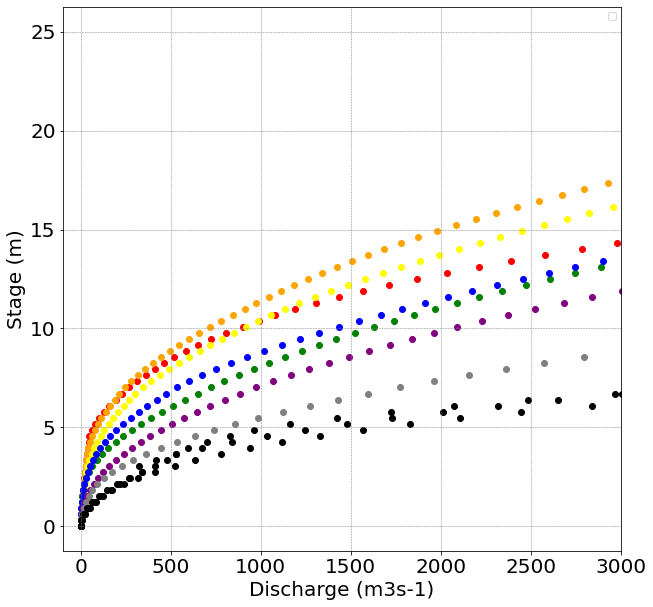

In [6]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# fig, ax = plt.subplots()
ax.scatter(x=a['Discharge (m3s-1)'], y=a['Stage'],label='',c='red')
ax.scatter(x=b['Discharge (m3s-1)'], y=b['Stage'],label='',c='orange')
ax.scatter(x=c['Discharge (m3s-1)'], y=c['Stage'],label='',c='yellow')
ax.scatter(x=d['Discharge (m3s-1)'], y=d['Stage'],label='',c='green')
ax.scatter(x=e['Discharge (m3s-1)'], y=e['Stage'],label='',c='blue')
ax.scatter(x=f['Discharge (m3s-1)'], y=f['Stage'],label='',c='purple')
ax.scatter(x=g['Discharge (m3s-1)'], y=g['Stage'],label='',c='gray')
ax.scatter(x=x['Discharge (m3s-1)'], y=x['Stage'],label='',c='black')
ax.scatter(x=y['Discharge (m3s-1)'], y=y['Stage'],label='',c='black')
ax.scatter(x=z['Discharge (m3s-1)'], y=z['Stage'],label='',c='black')

ax.legend()
# lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
# now plot both limits against eachother
ax.plot()
# ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# ax.set_aspect('equal')
ax.set_xlim([-100,3000])
# ax.set_ylim(lims)
plt.xlabel("Discharge (m3s-1)")
plt.ylabel("Stage (m)")
plt.grid(color = 'gray', linestyle='--',linewidth = 0.5)
# plt.savefig('StreamDepth.png')


No handles with labels found to put in legend.


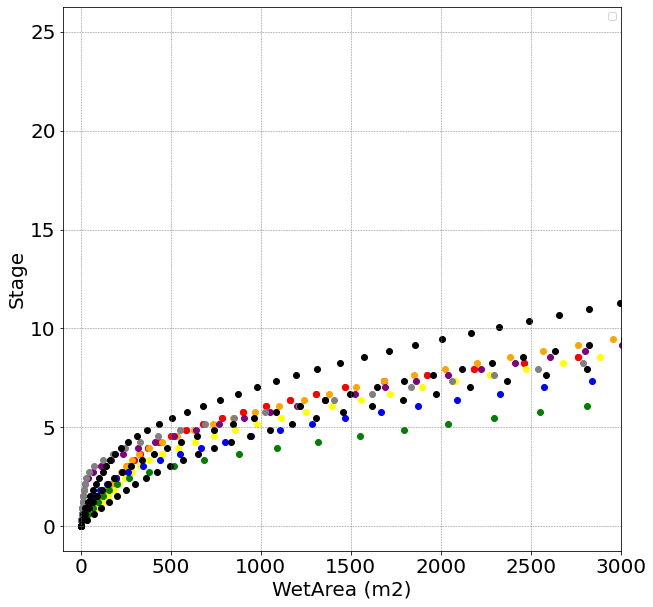

In [6]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# fig, ax = plt.subplots()
ax.scatter(x=a['WetArea (m2)'], y=a['Stage'],label='',c='red')
ax.scatter(x=a['WetArea (m2)'], y=a['Stage'],label='',c='red')
ax.scatter(x=b['WetArea (m2)'], y=b['Stage'],label='',c='orange')
ax.scatter(x=c['WetArea (m2)'], y=c['Stage'],label='',c='yellow')
ax.scatter(x=d['WetArea (m2)'], y=d['Stage'],label='',c='green')
ax.scatter(x=e['WetArea (m2)'], y=e['Stage'],label='',c='blue')
ax.scatter(x=f['WetArea (m2)'], y=f['Stage'],label='',c='purple')
ax.scatter(x=g['WetArea (m2)'], y=g['Stage'],label='',c='gray')
ax.scatter(x=x['WetArea (m2)'], y=x['Stage'],label='',c='black')
ax.scatter(x=y['WetArea (m2)'], y=y['Stage'],label='',c='black')
ax.scatter(x=z['WetArea (m2)'], y=z['Stage'],label='',c='black')

ax.legend()
# lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
# now plot both limits against eachother
ax.plot()
# ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# ax.set_aspect('equal')
ax.set_xlim([-100,3000])
# ax.set_ylim(lims)
plt.xlabel("WetArea (m2)")
plt.ylabel("Stage")
plt.grid(color = 'gray', linestyle='--',linewidth = 0.5)
plt.savefig('StreamDepth.png')


In [12]:
rmse = ((data['Stream_H_m'] - data['Predict_Stream_H_m']) ** 2).mean() ** .5
print("\nRMSE = " + str(round(rmse,6)))


RMSE = 1.251442


In [13]:
correlation_matrix = np.corrcoef(data['Stream_H_m'], data['Predict_Stream_H_m'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.47699154300948715

In [13]:
import scipy
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(data['Stream_H_m'], data['Predict_Stream_H_m'])
# print(slope, intercept, r_value, p_value, std_err)
scipy.stats.linregress(data['Stream_H_m'], data['Predict_Stream_H_m'])

LinregressResult(slope=0.8068667621323719, intercept=0.7223949776360823, rvalue=0.7629925914002844, pvalue=5.6510015059412145e-183, stderr=0.022131636155689326)

In [14]:
data

,Unnamed: 0,OBJECTID *,SITE_NUM,HWM_ID,SITE_ID,NAME,LAT_DD,LON_DD,HWM_ELEV_ft,HWM_ELEV_m,...,HAND_m,Inun_Depth_m,Stream_H_m,COMID,StreamOrde,fmax,time_file,Predict_Stream_H_m,roughness,RMSE
0,0,2,1,2,ASSU1,ASSU1_2,40.211139,-74.762472,26.3375,8.027670,...,6.840959,0.681777,7.522736,4481733,6,5024.489888,20110829_07,7.851095,0.039937,0.273144
1,1,3,1,3,ASSU1,ASSU1_3,40.210889,-74.763111,24.3275,7.415022,...,6.481321,1.422757,7.904078,4481733,6,5024.489888,20110829_07,7.851095,0.039937,0.273144
2,2,4,1,4,ASSU1,ASSU1_4,40.210889,-74.763222,24.2275,7.384542,...,6.481321,1.706220,8.187541,4481733,6,5024.489888,20110829_07,7.851095,0.039937,0.273144
3,3,5,2,1,ASSU2,ASSU2_1,40.217500,-74.767917,19.9350,6.076188,...,5.097004,-0.378092,4.718912,2590137,3,435.669990,20110828_08,4.452237,0.029694,0.630860
4,4,6,2,2,ASSU2,ASSU2_2,40.217389,-74.768083,19.8250,6.042660,...,5.565677,-1.086848,4.478829,2590137,3,435.669990,20110828_08,4.452237,0.029694,0.630860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,27,60,NaN,Somerset,NaN,625181.134200,468199.584400,47.6254,14.516222,...,6.369551,0.590932,6.960483,9513382,5,1593.829964,20110828_18,6.338650,0.006644,0.629992
952,952,56,107,NaN,Somerset,NaN,629101.816800,484529.513000,36.3069,11.066343,...,5.057386,2.159721,7.217107,9514000,6,2586.619942,20110828_20,6.886389,0.005000,1.443823
953,953,63,115,NaN,Somerset,NaN,631875.527600,477348.825100,52.6148,16.036991,...,9.578168,-0.963599,8.614569,9513850,3,127.239997,20110828_06,3.987255,0.300000,2.502124
954,954,62,114,NaN,Somerset,NaN,632110.714500,477320.712300,53.0096,16.157326,...,9.169795,-0.239994,8.929801,9513850,3,127.239997,20110828_06,3.987255,0.300000,2.502124


In [15]:
catch = data.drop_duplicates(subset='COMID')
# catch = catch.drop(labels=['SITE_NUM', 'HWM_ID', 'SITE_ID', 'NAME', 'LAT_DD', 'LON_DD', 'HWM_ELEV_ft', \
#         'HWM_ELEV_m','DEM_m','HAND_m','Inun_Depth_m', 'time_file'], axis='columns')
catch

,Unnamed: 0,Unnamed: 0.1,OID_,OID1,SITE_NUM,HWM_ID,SITE_ID,NAME,LAT_DD,LON_DD,...,dev,Cleaning_note,fmax,time_file,Predict_Stream_H_m,roughness,rmse,RMSE,CatchId,StreamOrde
0,0,0,1039,NaN,NaN,NaN,Somerset,4,40.509285,-74.570339,...,NaN,NaN,22.320000,20110828_05,1.337078,0.005000,1.265936e-01,0.126594,9513572,2.0
1,1,1,1046,NaN,NaN,NaN,Somerset,5,40.469505,-74.544521,...,NaN,NaN,80.229998,20110828_05,2.056241,0.005000,5.942049e-01,0.594205,9514722,2.0
2,2,2,1037,NaN,NaN,NaN,Somerset,6,40.374587,-74.618079,...,NaN,NaN,799.439982,20110828_11,3.944849,0.034375,3.060844e-07,0.0,9515554,4.0
3,3,3,1036,NaN,NaN,NaN,Somerset,7,40.399474,-74.627159,...,NaN,NaN,789.229982,20110828_13,4.466071,0.008638,1.285609e-01,0.128561,9515544,4.0
6,6,6,969,NaN,NaN,NaN,Somerset,12,40.565279,-74.637317,...,NaN,NaN,1582.159965,20110828_17,5.590755,0.096550,5.288467e-01,0.528847,9513352,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1005,1005,924,NaN,152.0,1.0,WHIP5,WHIP5_1,40.815861,-74.445556,...,1.311436,NaN,124.039997,20110828_14,2.107789,0.009362,9.469104e-01,0.94691,6250088,3.0
975,1013,1013,932,NaN,153.0,1.0,WHIP6,WHIP6_1,40.801222,-74.465972,...,1.919210,NaN,128.389997,20110828_13,2.274434,0.022687,1.159648e+00,1.159648,6250748,3.0
982,1021,1021,940,NaN,154.0,2.0,WHIP7,WHIP7_2,40.812944,-74.480833,...,0.646009,NaN,119.439997,20110828_13,2.144793,0.113028,6.982896e-01,0.69829,6250092,3.0
989,1028,1028,947,NaN,155.0,3.0,WHIP8,WHIP8_3,40.813028,-74.505528,...,0.324511,NaN,83.739998,20110828_13,2.132867,0.074551,5.501594e-01,0.550159,6250744,2.0


In [ ]:
# subset = data.loc[data.StreamOrde == 1]
# subset.COMID.unique()

In [16]:
print("Order  Avg_Fmax  Avg_H  Avg_rough  Avg_RMSE  COMIDs  Pt_Count")
for order in np.sort(catch.StreamOrde.unique()):
    subset = catch.loc[catch.StreamOrde == order]
    print(f'{order: 3}  {round(subset.fmax.mean(),1):9}  {round(subset.Predict_Stream_H_m.mean(),1):5}\
    {round(subset.roughness.mean(),3):6}  {round(subset.RMSE.mean(),2):7} {len(subset.COMID.unique()):7} \
    {round(len(subset),1):7}')

Order  Avg_Fmax  Avg_H  Avg_rough  Avg_RMSE  COMIDs  Pt_Count
 1.0        7.6    1.0     0.195     2.11       8           8
 2.0       55.3    1.9     0.086     0.48      38          38
 3.0      197.2    2.7     0.058      0.4      56          56
 4.0      532.4    2.9     0.031     0.54      53          53
 5.0     1143.0    4.7     0.049     0.57      22          22
 6.0     2666.1    5.5     0.012      1.4      17          17


In [17]:
print("Order  Med_Fmax  Med_H  Med_rough  Med_RMSE  COMIDs  Pt_Count")
for order in np.sort(catch.StreamOrde.unique()):
    subset = catch.loc[catch.StreamOrde == order]
    print(f'{order: 3}  {round(subset.fmax.median(),1):9}  {round(subset.Predict_Stream_H_m.median(),1):5}\
    {round(subset.roughness.median(),3):6}  {round(subset.RMSE.median(),2):7} {len(subset.COMID.unique()):7} \
    {round(len(subset),1):7}')

Order  Med_Fmax  Med_H  Med_rough  Med_RMSE  COMIDs  Pt_Count
 1.0        3.1    1.0       0.2     1.37       8           8
 2.0       47.2    1.9      0.06     0.34      38          38
 3.0      160.0    2.6      0.04     0.25      56          56
 4.0      550.1    2.8      0.02     0.23      53          53
 5.0      989.3    5.2     0.009      0.1      22          22
 6.0     2485.8    6.2     0.005     0.62      17          17


In [18]:
catch2 = catch[catch.roughness < 0.299]
catch2 = catch2[catch2.roughness > 0.0051]

In [19]:
print("Order  Avg_Fmax  Avg_H  Avg_rough  Avg_RMSE  COMIDs  Pt_Count")
for order in np.sort(catch2.StreamOrde.unique()):
    subset = catch2.loc[catch2.StreamOrde == order]
    print(f'{order: 3}  {round(subset.fmax.mean(),1):9}  {round(subset.Predict_Stream_H_m.mean(),1):5}\
    {round(subset.roughness.mean(),3):6}  {round(subset.RMSE.mean(),2):7}   {len(subset.COMID.unique()):7} \
    {round(len(subset),1):4}')

Order  Avg_Fmax  Avg_H  Avg_rough  Avg_RMSE  COMIDs  Pt_Count
  1       11.8    5.8     0.071      0.0         1        1
  2       61.4    2.3     0.077     0.21        25       25
  3      201.9    3.1      0.07      0.2        49       49
  4      537.0    3.3     0.041     0.24        41       41
  5     1138.4    5.2     0.046     0.16        16       16
  6     2854.4    5.2     0.023     0.14         8        8


In [20]:
print("Order  Med_Fmax  Med_H  Med_rough  Med_RMSE  COMIDs  Pt_Count")
for order in np.sort(catch2.StreamOrde.unique()):
    subset = catch2.loc[catch2.StreamOrde == order]
    print(f'{order: 3}  {round(subset.fmax.median(),1):9}  {round(subset.Predict_Stream_H_m.median(),1):5}\
    {round(subset.roughness.median(),3):6}  {round(subset.RMSE.median(),2):7} {len(subset.COMID.unique()):7} \
    {round(len(subset),1):7}')

Order  Med_Fmax  Med_H  Med_rough  Med_RMSE  COMIDs  Pt_Count
  1       11.8    5.8     0.071      0.0       1           1
  2       53.1    2.2     0.061     0.16      25          25
  3      156.8    2.8     0.055     0.15      49          49
  4      550.1    3.2      0.03     0.18      41          41
  5      989.3    5.4     0.014     0.09      16          16
  6     2541.5    5.2     0.021     0.06       8           8


In [ ]:
catch.describe()

In [ ]:
catch_data1 = pd.read_csv('CatchPointsWithData_DEM.csv')
catch_data1

In [ ]:
catch_data2 = pd.read_csv('CatchPointsWithRunoffC.csv')
catch_data2

In [ ]:
catch2 = catch.merge(catch_data1, on='COMID')
catch2 = catch2.merge(catch_data2, on='COMID')
catch2

In [ ]:
catch3 = catch2.drop_duplicates(subset='COMID')
catch3

In [ ]:
# catch3.to_csv('./Iter6/HWM_Combined_Opt_DEM.csv')

In [ ]:
data_x = pd.read_csv('./Cleaned Hwm/hydrogeo-fulltable-020999.csv')
data_x

In [ ]:
data_x = data_x.drop_duplicates(subset='CatchId')
data_x

In [ ]:
catch4 = catch3.merge(data_x, left_on='COMID', right_on='CatchId')
catch4

In [ ]:
# catch4.to_csv('./Iter6/HWM_Combined_Opt_DEM.csv')